In [ ]:
!pip install geopandas
!pip install folium
!pip install lightgbm
!pip install utm
!pip install geojson 
!pip install haversine

In [ ]:
# 시각화 도구 설치
!pip install plotnine #R 시각화 
!pip install folium #지도 시각화 

# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [185]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


In [186]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import folium 
import geopandas as gpd
import math
from tqdm.notebook import tqdm
import utm
from shapely.geometry import Point, Polygon
from haversine import haversine
from plotnine import *

## 데이터 가공

### 표제부 합치기

In [ ]:
# gangnam = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/강남구.xlsx', header = 4)
# gangdong = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/강동구.xlsx', header = 4)
# gangbuk = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/강북구.xlsx',header = 4)
# gangseo = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/강서구.xlsx', header = 4)
# gwanak = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/관악구.xlsx', header = 4)
# gwangjin = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/광진구.xlsx', header = 4)
# guro = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/구로구.xlsx', header = 4)
# gumcheon = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/금천구.xlsx', header = 4)
# nowon = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/노원구.xlsx',header = 4)
# dobong = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/도봉구.xlsx', header = 4)
# dongdaemoon = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/동대문구.xlsx', header = 4)
# dongjak = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/동작구.xlsx', header = 4)
# mapo = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/마포구.xlsx', header = 4)
# seodaemoon = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/서대문구.xlsx', header = 4)
# seocho = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/서초구.xlsx', header = 4)
# seongdong = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/성동구.xlsx', header = 4)
# seongbuk = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/성북구.xlsx', header = 4)
# songpa = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/송파구.xlsx', header = 4)
# yangcheon = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/양천구.xlsx', header = 4)
# yeongdengpo = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/영등포구.xlsx', header = 4)
# yongsan = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/용산구.xlsx', header = 4)
# eunpyeong = pd.read_excel("/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/은평구.xlsx", header = 4)
# jongro = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/종로구.xlsx', header = 4)
# jung = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/중구.xlsx', header = 4)
# jungrang = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_총괄표제부_법정동/중랑구.xlsx', header = 4)

In [ ]:
df1 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/강남구.xlsx', header = 4)
df2 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/강동구.xlsx', header = 4)
df3 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/강북구.xlsx',header = 4)
df4 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/강서구.xlsx', header = 4)
df5 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/관악구.xlsx', header = 4)
df6 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/광진구.xlsx', header = 4)
df7 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/구로구.xlsx', header = 4)
df8 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/금천구.xlsx', header = 4)
df9 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/노원구.xlsx',header = 4)
df10 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/도봉구.xlsx', header = 4)
df11 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/동대문구.xlsx', header = 4)
df12 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/동작구.xlsx', header = 4)
df13 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/마포구.xlsx', header = 4)
df14 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/서대문구.xlsx', header = 4)
df15 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/서초구.xlsx', header = 4)
df16 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/성동구.xlsx', header = 4)
df17 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/성북구.xlsx', header = 4)
df18 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/송파구.xlsx', header = 4)
df19 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/양천구.xlsx', header = 4)
df20 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/영등포구.xlsx', header = 4)
df21 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/용산구.xlsx', header = 4)
df22 = pd.read_excel("/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/은평구.xlsx", header = 4)
df23 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/종로구.xlsx', header = 4)
df24 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/중구.xlsx', header = 4)
df25 = pd.read_excel('/content/drive/My Drive/Project/Seoul/건축물대장_표제부_법정동/중랑구.xlsx', header = 4)

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25]).reset_index()
df = df[['시군구코드','법정동코드', '대지위치', '도로명대지위치', '대지면적(㎡)','건축면적(㎡)', '건폐율(%)','용적률(%)','연면적(㎡)','주용도코드', '주용도코드명', '세대수(세대)','가구수(가구)']]
df

,시군구코드,법정동코드,대지위치,도로명대지위치,대지면적(㎡),건축면적(㎡),건폐율(%),용적률(%),연면적(㎡),주용도코드,주용도코드명,세대수(세대),가구수(가구)
0,11680,10100,서울특별시 강남구 역삼동 109-16번지,,227.20,134.10,59.02,171.48,555.30,01000,단독주택,0,7
1,11680,10100,서울특별시 강남구 역삼동 109-19번지,,0.00,129.32,0.00,0.00,518.42,01000,단독주택,0,9
2,11680,10100,서울특별시 강남구 역삼동 209-1번지,,820.00,322.67,39.35,39.35,425.33,19000,위험물저장및처리시설,0,0
3,11680,10100,서울특별시 강남구 역삼동 601-10번지,서울특별시 강남구 봉은사로4길 10,361.30,180.59,49.98,229.96,998.13,04000,제2종근린생활시설,0,0
4,11680,10100,서울특별시 강남구 역삼동 601-11번지,서울특별시 강남구 강남대로110길 11,0.00,100.58,0.00,0.00,491.99,03000,제1종근린생활시설,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
605930,11260,10600,서울특별시 중랑구 신내동 산 61-9번지,서울특별시 중랑구 용마산로139다길 19-24,459.62,227.66,49.53,49.53,227.66,01000,단독주택,0,1
605931,11260,10600,서울특별시 중랑구 신내동 산 74번지,,0.00,30.74,0.00,0.00,30.74,01000,단독주택,0,1
605932,11260,10600,서울특별시 중랑구 신내동 산 74번지,,0.00,29.10,0.00,0.00,29.10,01000,단독주택,0,1
605933,11260,10600,서울특별시 중랑구 신내동 산 74번지,,0.00,371.51,0.00,0.00,371.51,01000,단독주택,0,1


In [429]:
df['주용도코드명'].unique()

array(['단독주택', '위험물저장및처리시설', '제2종근린생활시설', '제1종근린생활시설', '업무시설', '공동주택',
       '숙박시설', '창고시설', '교육연구시설', '의료시설', '종교시설', '문화및집회시설', '노유자시설',
       '운동시설', '자동차관련시설', '방송통신시설', '판매시설', '위락시설', '수련시설', '동.식물관련시설',
       '관광휴게시설', '근린생활시설', '공장', '교정및군사시설', '운수시설', '분뇨.쓰레기처리시설',
       '자원순환관련시설', '판매및영업시설', '발전시설', '교육연구및복지시설', '묘지관련시설', '장례시설', nan,
       '공공용시설', '야영장시설'], dtype=object)

In [ ]:
# df.to_csv('/content/drive/My Drive/Project/Seoul/서울시_건축대장표제부_병합.csv', index=False)

### 행정동 법정동 mapping 코드

In [389]:
# 행정동 법정동 코드
code = pd.read_excel('/content/drive/My Drive/Project/Seoul/서울시_행정동_법정동_20200814.xlsx')
code = code[code['시도명']=='서울특별시']
code

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN
...,...,...,...,...,...,...,...,...
763,1174065000,서울특별시,강동구,성내제2동,1174010800,성내동,19880423,NaN
764,1174066000,서울특별시,강동구,성내제3동,1174010800,성내동,19880423,NaN
765,1174068500,서울특별시,강동구,길동,1174010500,길동,20080707,NaN
766,1174069000,서울특별시,강동구,둔촌제1동,1174010600,둔촌동,19880423,NaN


In [402]:
# 행정동 경계 dong_boundary geojson 읽기 
dong_boundary = gpd.read_file('/content/HangJeongDong_ver20200701.geojson')
dong_boundary

,OBJECTID,adm_nm,adm_cd,adm_cd2,sidonm,sggnm,geometry
0,0,서울특별시 종로구 사직동,1101053,1111053000,서울특별시,종로구,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,1,서울특별시 종로구 삼청동,1101054,1111054000,서울특별시,종로구,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,2,서울특별시 종로구 부암동,1101055,1111055000,서울특별시,종로구,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,3,서울특별시 종로구 평창동,1101056,1111056000,서울특별시,종로구,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,4,서울특별시 종로구 무악동,1101057,1111057000,서울특별시,종로구,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."
...,...,...,...,...,...,...,...
3483,3483,경기도 용인시기흥구 영덕1동,3119263,4146351600,경기도,용인시기흥구,"MULTIPOLYGON (((127.09981 37.27007, 127.09933 ..."
3484,3484,경기도 용인시기흥구 상갈동,3119265,4146353000,경기도,용인시기흥구,"MULTIPOLYGON (((127.12676 37.26603, 127.12538 ..."
3485,3485,경기도 용인시기흥구 동백2동,3119268,4146357500,경기도,용인시기흥구,"MULTIPOLYGON (((127.15189 37.27909, 127.15327 ..."
3486,3486,경기도 용인시기흥구 동백1동,3119267,4146357200,경기도,용인시기흥구,"MULTIPOLYGON (((127.17370 37.27413, 127.17166 ..."


In [403]:
dong_boundary['위도'] = dong_boundary['geometry'].centroid
mapper = lambda x: float(str(x)[6:].strip('\(').strip('\)').split(' ')[1]) #geometry에서 위도 반환 
dong_boundary['위도'] = dong_boundary['위도'].map(mapper)

dong_boundary['경도'] = dong_boundary['geometry'].centroid
mapper = lambda x: float(str(x)[6:].strip('\(').strip('\)').split(' ')[0]) #geometry에서 경도 반환 
dong_boundary['경도'] = dong_boundary['경도'].map(mapper)

mapper = lambda x: x.split()[2] 
dong_boundary['행정동'] = dong_boundary['adm_nm'].map(mapper) #행정동 분리 
dong_boundary

dong_boundary

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


,OBJECTID,adm_nm,adm_cd,adm_cd2,sidonm,sggnm,geometry,위도,경도,행정동
0,0,서울특별시 종로구 사직동,1101053,1111053000,서울특별시,종로구,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",37.574108,126.970144,사직동
1,1,서울특별시 종로구 삼청동,1101054,1111054000,서울특별시,종로구,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...",37.588013,126.981114,삼청동
2,2,서울특별시 종로구 부암동,1101055,1111055000,서울특별시,종로구,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...",37.596699,126.962557,부암동
3,3,서울특별시 종로구 평창동,1101056,1111056000,서울특별시,종로구,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...",37.613965,126.969274,평창동
4,4,서울특별시 종로구 무악동,1101057,1111057000,서울특별시,종로구,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...",37.577741,126.958989,무악동
...,...,...,...,...,...,...,...,...,...,...
3483,3483,경기도 용인시기흥구 영덕1동,3119263,4146351600,경기도,용인시기흥구,"MULTIPOLYGON (((127.09981 37.27007, 127.09933 ...",37.275369,127.081044,영덕1동
3484,3484,경기도 용인시기흥구 상갈동,3119265,4146353000,경기도,용인시기흥구,"MULTIPOLYGON (((127.12676 37.26603, 127.12538 ...",37.265640,127.110956,상갈동
3485,3485,경기도 용인시기흥구 동백2동,3119268,4146357500,경기도,용인시기흥구,"MULTIPOLYGON (((127.15189 37.27909, 127.15327 ...",37.266627,127.161616,동백2동
3486,3486,경기도 용인시기흥구 동백1동,3119267,4146357200,경기도,용인시기흥구,"MULTIPOLYGON (((127.17370 37.27413, 127.17166 ...",37.285937,127.164580,동백1동


In [404]:
dong_boundary = dong_boundary[dong_boundary['sidonm']=='서울특별시']
dong_boundary = dong_boundary[['adm_cd2','sggnm','행정동', 'geometry','위도', '경도']]
dong_boundary.columns = ['행정동코드','구', '행정동','geometry','위도', '경도']
dong_boundary

,행정동코드,구,행정동,geometry,위도,경도
0,1111053000,종로구,사직동,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",37.574108,126.970144
1,1111054000,종로구,삼청동,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...",37.588013,126.981114
2,1111055000,종로구,부암동,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...",37.596699,126.962557
3,1111056000,종로구,평창동,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...",37.613965,126.969274
4,1111057000,종로구,무악동,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...",37.577741,126.958989
...,...,...,...,...,...,...
420,1174070000,강동구,둔촌2동,"MULTIPOLYGON (((127.15355 37.53400, 127.15357 ...",37.531514,127.147414
421,1174057000,강동구,암사1동,"MULTIPOLYGON (((127.14447 37.55477, 127.14319 ...",37.551855,127.134586
422,1174061000,강동구,천호2동,"MULTIPOLYGON (((127.13458 37.54712, 127.13115 ...",37.544691,127.122275
423,1174068500,강동구,길동,"MULTIPOLYGON (((127.14857 37.54578, 127.14871 ...",37.539725,127.145907


In [405]:
# merge를 위해 타입 통일 
dong_boundary['행정동코드'] = dong_boundary['행정동코드'].astype(int)
code['행정동코드'] = code['행정동코드'].astype(int)
dong_boundary['행정동'] = dong_boundary['행정동'].astype(str)
code['읍면동명'] = code['읍면동명'].astype(str)

In [408]:
# 행정동과 법정동 mapping code & 위치 정보 합치기 
df_code = dong_boundary.merge(code, on ='행정동코드')
df_code = df_code[['행정동코드','시군구명', '읍면동명','법정동코드', '동리명', 'geometry', '위도', '경도']]
df_code

,행정동코드,시군구명,읍면동명,법정동코드,동리명,geometry,위도,경도
0,1111053000,종로구,사직동,1111010600,통의동,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",37.574108,126.970144
1,1111053000,종로구,사직동,1111010700,적선동,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",37.574108,126.970144
2,1111053000,종로구,사직동,1111011200,체부동,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",37.574108,126.970144
3,1111053000,종로구,사직동,1111011300,필운동,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",37.574108,126.970144
4,1111053000,종로구,사직동,1111011400,내자동,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",37.574108,126.970144
...,...,...,...,...,...,...,...,...
737,1174057000,강동구,암사제1동,1174010700,암사동,"MULTIPOLYGON (((127.14447 37.55477, 127.14319 ...",37.551855,127.134586
738,1174061000,강동구,천호제2동,1174010900,천호동,"MULTIPOLYGON (((127.13458 37.54712, 127.13115 ...",37.544691,127.122275
739,1174068500,강동구,길동,1174010500,길동,"MULTIPOLYGON (((127.14857 37.54578, 127.14871 ...",37.539725,127.145907
740,1153078000,구로구,오류제2동,1153010800,오류동,"MULTIPOLYGON (((126.83179 37.47757, 126.83235 ...",37.485265,126.838372


In [411]:
df_code.to_pickle('/content/drive/My Drive/Project/Seoul/행정동_법정동_매칭코드.pickle')

In [395]:
# df_code.to_file('/content/drive/My Drive/Project/Seoul/dong_boundary.geojson', driver='GeoJSON')

### 행정동 좌표 

In [412]:
# 행정동 좌표 code
df_code_hangjeong = df_code.drop_duplicates(subset='행정동코드').reset_index().drop(['index','법정동코드', '동리명'], axis=1)
df_code_hangjeong

,행정동코드,시군구명,읍면동명,geometry,위도,경도
0,1111053000,종로구,사직동,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",37.574108,126.970144
1,1111054000,종로구,삼청동,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...",37.588013,126.981114
2,1111055000,종로구,부암동,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...",37.596699,126.962557
3,1111056000,종로구,평창동,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...",37.613965,126.969274
4,1111057000,종로구,무악동,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...",37.577741,126.958989
...,...,...,...,...,...,...
420,1174070000,강동구,둔촌제2동,"MULTIPOLYGON (((127.15355 37.53400, 127.15357 ...",37.531514,127.147414
421,1174057000,강동구,암사제1동,"MULTIPOLYGON (((127.14447 37.55477, 127.14319 ...",37.551855,127.134586
422,1174061000,강동구,천호제2동,"MULTIPOLYGON (((127.13458 37.54712, 127.13115 ...",37.544691,127.122275
423,1174068500,강동구,길동,"MULTIPOLYGON (((127.14857 37.54578, 127.14871 ...",37.539725,127.145907


In [413]:
df_code_hangjeong.to_file('/content/drive/My Drive/Project/Seoul/hangjeongdong_boundary.geojson', driver='GeoJSON')

## 행정동 법정동 Mapping

In [432]:
df['법정동'] = df[['시군구코드','법정동코드']].astype(str).agg(''.join, axis=1).astype(int)
df

,시군구코드,법정동코드,대지위치,도로명대지위치,대지면적(㎡),건축면적(㎡),건폐율(%),용적률(%),연면적(㎡),주용도코드,주용도코드명,세대수(세대),가구수(가구),법정동
0,11680,10100,서울특별시 강남구 역삼동 109-16번지,,227.20,134.10,59.02,171.48,555.30,01000,단독주택,0,7,1168010100
1,11680,10100,서울특별시 강남구 역삼동 109-19번지,,0.00,129.32,0.00,0.00,518.42,01000,단독주택,0,9,1168010100
2,11680,10100,서울특별시 강남구 역삼동 209-1번지,,820.00,322.67,39.35,39.35,425.33,19000,위험물저장및처리시설,0,0,1168010100
3,11680,10100,서울특별시 강남구 역삼동 601-10번지,서울특별시 강남구 봉은사로4길 10,361.30,180.59,49.98,229.96,998.13,04000,제2종근린생활시설,0,0,1168010100
4,11680,10100,서울특별시 강남구 역삼동 601-11번지,서울특별시 강남구 강남대로110길 11,0.00,100.58,0.00,0.00,491.99,03000,제1종근린생활시설,0,1,1168010100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605930,11260,10600,서울특별시 중랑구 신내동 산 61-9번지,서울특별시 중랑구 용마산로139다길 19-24,459.62,227.66,49.53,49.53,227.66,01000,단독주택,0,1,1126010600
605931,11260,10600,서울특별시 중랑구 신내동 산 74번지,,0.00,30.74,0.00,0.00,30.74,01000,단독주택,0,1,1126010600
605932,11260,10600,서울특별시 중랑구 신내동 산 74번지,,0.00,29.10,0.00,0.00,29.10,01000,단독주택,0,1,1126010600
605933,11260,10600,서울특별시 중랑구 신내동 산 74번지,,0.00,371.51,0.00,0.00,371.51,01000,단독주택,0,1,1126010600


In [433]:
df_merged = df.merge(df_code, left_on ='법정동' ,right_on='법정동코드')[['시군구명', '읍면동명','행정동코드', '법정동코드_y','대지위치', '도로명대지위치', '대지면적(㎡)','건축면적(㎡)', '건폐율(%)','용적률(%)', '연면적(㎡)','주용도코드', '주용도코드명', '세대수(세대)','가구수(가구)']]
df_merged

,시군구명,읍면동명,행정동코드,법정동코드_y,대지위치,도로명대지위치,대지면적(㎡),건축면적(㎡),건폐율(%),용적률(%),연면적(㎡),주용도코드,주용도코드명,세대수(세대),가구수(가구)
0,강남구,역삼1동,1168064000,1168010100,서울특별시 강남구 역삼동 109-16번지,,227.2,134.10,59.02,171.48,555.30,01000,단독주택,0,7
1,강남구,역삼2동,1168065000,1168010100,서울특별시 강남구 역삼동 109-16번지,,227.2,134.10,59.02,171.48,555.30,01000,단독주택,0,7
2,강남구,역삼1동,1168064000,1168010100,서울특별시 강남구 역삼동 109-19번지,,0.0,129.32,0.00,0.00,518.42,01000,단독주택,0,9
3,강남구,역삼2동,1168065000,1168010100,서울특별시 강남구 역삼동 109-19번지,,0.0,129.32,0.00,0.00,518.42,01000,단독주택,0,9
4,강남구,역삼1동,1168064000,1168010100,서울특별시 강남구 역삼동 209-1번지,,820.0,322.67,39.35,39.35,425.33,19000,위험물저장및처리시설,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978623,중랑구,신내2동,1126069000,1126010600,서울특별시 중랑구 신내동 산 74번지,,0.0,29.10,0.00,0.00,29.10,01000,단독주택,0,1
1978624,중랑구,신내1동,1126068000,1126010600,서울특별시 중랑구 신내동 산 74번지,,0.0,371.51,0.00,0.00,371.51,01000,단독주택,0,1
1978625,중랑구,신내2동,1126069000,1126010600,서울특별시 중랑구 신내동 산 74번지,,0.0,371.51,0.00,0.00,371.51,01000,단독주택,0,1
1978626,중랑구,신내1동,1126068000,1126010600,서울특별시 중랑구 신내동 산 74번지,,0.0,17.52,0.00,0.00,17.52,01000,단독주택,0,1


In [434]:
len(df_merged['읍면동명'].unique())

424

In [435]:
len(dong_boundary['행정동'].unique())

424

In [436]:
len(code[code['시도명']=='서울특별시']['읍면동명'].unique())

425

## 1. 공동주택(02000)

In [437]:
# 공동주택
df_merged = df_merged[df_merged['주용도코드'] == '02000'].reset_index().drop('index',axis =1)
df_merged

,시군구명,읍면동명,행정동코드,법정동코드_y,대지위치,도로명대지위치,대지면적(㎡),건축면적(㎡),건폐율(%),용적률(%),연면적(㎡),주용도코드,주용도코드명,세대수(세대),가구수(가구)
0,강남구,역삼1동,1168064000,1168010100,서울특별시 강남구 역삼동 601-21번지,서울특별시 강남구 봉은사로4길 7,301.2,180.42,59.90,196.75,592.61,02000,공동주택,12,0
1,강남구,역삼2동,1168065000,1168010100,서울특별시 강남구 역삼동 601-21번지,서울특별시 강남구 봉은사로4길 7,301.2,180.42,59.90,196.75,592.61,02000,공동주택,12,0
2,강남구,역삼1동,1168064000,1168010100,서울특별시 강남구 역삼동 601-23번지,서울특별시 강남구 봉은사로4길 9,302.7,164.90,54.48,214.75,650.05,02000,공동주택,15,0
3,강남구,역삼2동,1168065000,1168010100,서울특별시 강남구 역삼동 601-23번지,서울특별시 강남구 봉은사로4길 9,302.7,164.90,54.48,214.75,650.05,02000,공동주택,15,0
4,강남구,역삼1동,1168064000,1168010100,서울특별시 강남구 역삼동 601-25번지,서울특별시 강남구 강남대로110길 19-4,0.0,109.80,0.00,0.00,326.76,02000,공동주택,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473142,중랑구,신내2동,1126069000,1126010600,서울특별시 중랑구 신내동 831번지,서울특별시 중랑구 신내역로 160,0.0,20.85,0.00,0.00,20.85,02000,공동주택,0,0
473143,중랑구,신내1동,1126068000,1126010600,서울특별시 중랑구 신내동 831번지,서울특별시 중랑구 신내역로 160,0.0,0.00,0.00,0.00,45.93,02000,공동주택,0,0
473144,중랑구,신내2동,1126069000,1126010600,서울특별시 중랑구 신내동 831번지,서울특별시 중랑구 신내역로 160,0.0,0.00,0.00,0.00,45.93,02000,공동주택,0,0
473145,중랑구,신내1동,1126068000,1126010600,서울특별시 중랑구 신내동 831번지,서울특별시 중랑구 신내역로 160,0.0,0.00,0.00,0.00,7.26,02000,공동주택,0,0


In [438]:
df_common= df_merged.groupby(['행정동코드', '읍면동명'], as_index =False)['행정동코드'].agg(['count'])
df_common[['건축면적(㎡)', '건폐율(%)','용적률(%)', '세대수(세대)','가구수(가구)']] = df_merged.groupby(['행정동코드', '읍면동명'], as_index = False)[['건축면적(㎡)', '건폐율(%)','용적률(%)', '세대수(세대)','가구수(가구)']].agg(['mean'])

In [439]:
df_common

,,count,건축면적(㎡),건폐율(%),용적률(%),세대수(세대),가구수(가구)
행정동코드,읍면동명,,,,,,
1111051500,청운효자동,379,125.269681,52.555743,191.928277,7.379947,0.005277
1111053000,사직동,98,348.211020,44.991429,153.290797,17.010204,0.071429
1111054000,삼청동,14,203.559286,34.089286,113.165714,4.357143,0.000000
1111055000,부암동,246,124.504472,24.580998,61.007185,6.914634,0.069106
1111056000,평창동,454,389.523883,20.485875,59.479189,8.856828,0.002203
...,...,...,...,...,...,...,...
1174065000,성내제2동,1247,193.674798,46.141739,178.642433,13.827586,0.003208
1174066000,성내제3동,1247,193.674798,46.141739,178.642433,13.827586,0.003208
1174068500,길동,683,232.939603,41.283617,176.225471,20.751098,0.055637


In [440]:
df_common.reset_index(level =['행정동코드', '읍면동명'], inplace = True)
df_common.columns = ['행정동코드','행정동명', '공동주택_개수', '공동주택_건축면적(㎡)', '공동주택_건폐율(%)', '공동주택_용적률(%)', '공동주택_세대수', '공동주택_가구수']
df_common 

,행정동코드,행정동명,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_용적률(%),공동주택_세대수,공동주택_가구수
0,1111051500,청운효자동,379,125.269681,52.555743,191.928277,7.379947,0.005277
1,1111053000,사직동,98,348.211020,44.991429,153.290797,17.010204,0.071429
2,1111054000,삼청동,14,203.559286,34.089286,113.165714,4.357143,0.000000
3,1111055000,부암동,246,124.504472,24.580998,61.007185,6.914634,0.069106
4,1111056000,평창동,454,389.523883,20.485875,59.479189,8.856828,0.002203
...,...,...,...,...,...,...,...,...
420,1174065000,성내제2동,1247,193.674798,46.141739,178.642433,13.827586,0.003208
421,1174066000,성내제3동,1247,193.674798,46.141739,178.642433,13.827586,0.003208
422,1174068500,길동,683,232.939603,41.283617,176.225471,20.751098,0.055637
423,1174069000,둔촌제1동,359,231.635373,36.682957,139.272450,20.142061,0.000000


In [418]:
df_common = df_common.merge(df_code_hangjeong, on ='행정동코드')
df_common = df_common[['행정동코드', '행정동명', '공동주택_개수', '공동주택_건축면적(㎡)', '공동주택_건폐율(%)','공동주택_용적률(%)', '공동주택_세대수', '공동주택_가구수']]
df_common

,행정동코드,행정동명,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_용적률(%),공동주택_세대수,공동주택_가구수
0,1111051500,청운효자동,379,125.269681,52.555743,191.928277,7.379947,0.005277
1,1111053000,사직동,98,348.211020,44.991429,153.290797,17.010204,0.071429
2,1111054000,삼청동,14,203.559286,34.089286,113.165714,4.357143,0.000000
3,1111055000,부암동,246,124.504472,24.580998,61.007185,6.914634,0.069106
4,1111056000,평창동,454,389.523883,20.485875,59.479189,8.856828,0.002203
...,...,...,...,...,...,...,...,...
420,1174065000,성내제2동,1247,193.674798,46.141739,178.642433,13.827586,0.003208
421,1174066000,성내제3동,1247,193.674798,46.141739,178.642433,13.827586,0.003208
422,1174068500,길동,683,232.939603,41.283617,176.225471,20.751098,0.055637
423,1174069000,둔촌제1동,359,231.635373,36.682957,139.272450,20.142061,0.000000


In [419]:
df_common.describe()

,행정동코드,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_용적률(%),공동주택_세대수,공동주택_가구수
count,4.250000e+02,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,1.143342e+09,1113.287059,332.428278,33.856819,134.912691,23.948595,0.095828
std,1.917263e+07,1031.860045,407.419586,15.309250,147.205039,16.274327,0.330454
min,1.111052e+09,4.000000,88.333173,0.222040,1.788210,4.357143,0.000000
25%,1.126066e+09,359.000000,180.417236,26.254444,99.164882,14.622052,0.000000
50%,1.144063e+09,863.000000,235.843516,34.569383,128.343814,19.700905,0.003247
75%,1.159068e+09,1496.000000,330.172708,41.846915,150.445270,28.307143,0.041289
max,1.174070e+09,6394.000000,4486.544980,174.582301,2157.792905,191.750000,3.354037


In [420]:
df_common.corr()

,행정동코드,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_용적률(%),공동주택_세대수,공동주택_가구수
행정동코드,1.000000,0.259081,-0.019442,-0.087728,-0.080121,0.012757,-0.024746
공동주택_개수,0.259081,1.000000,-0.143481,0.188796,0.010398,-0.319376,-0.081458
공동주택_건축면적(㎡),-0.019442,-0.143481,1.000000,-0.100739,0.176628,0.453820,0.030927
공동주택_건폐율(%),-0.087728,0.188796,-0.100739,1.000000,0.813705,-0.387297,-0.081583
공동주택_용적률(%),-0.080121,0.010398,0.176628,0.813705,1.000000,0.043130,-0.024570
공동주택_세대수,0.012757,-0.319376,0.453820,-0.387297,0.043130,1.000000,0.063731
공동주택_가구수,-0.024746,-0.081458,0.030927,-0.081583,-0.024570,0.063731,1.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


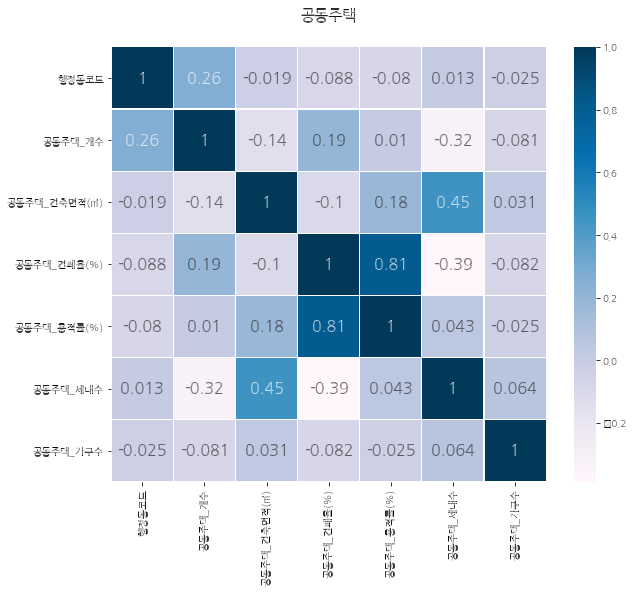

In [421]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("공동주택", y = 1.05, size = 15) 
sns.heatmap(df_common.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

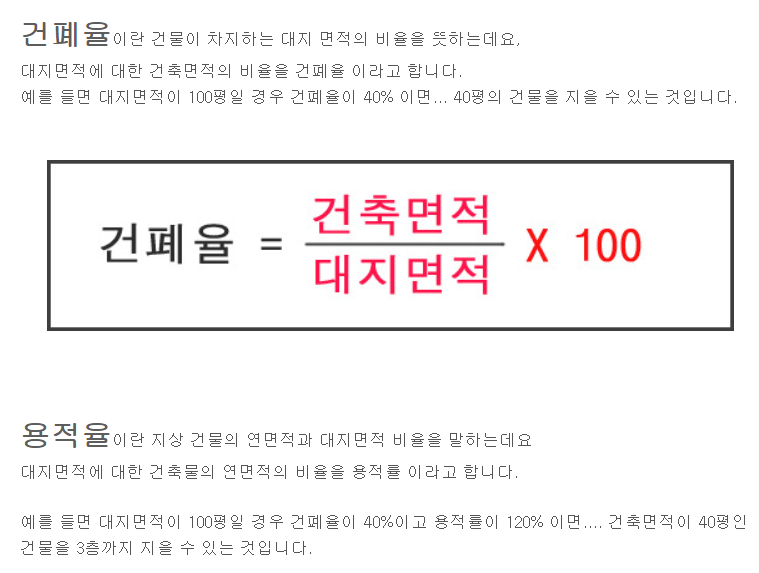

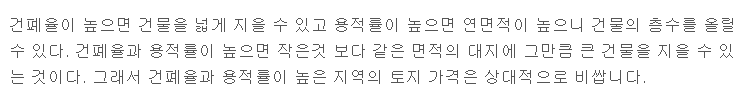

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fcf6db278>,
      dtype=object)

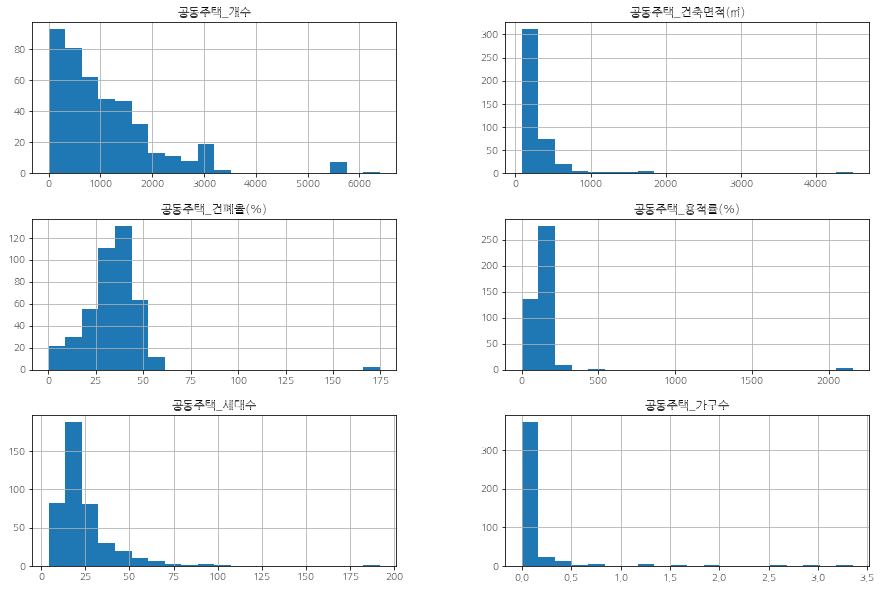

In [349]:
df_common.hist(figsize=(15,10), bins=20)

<Figure size 1440x1440 with 0 Axes>

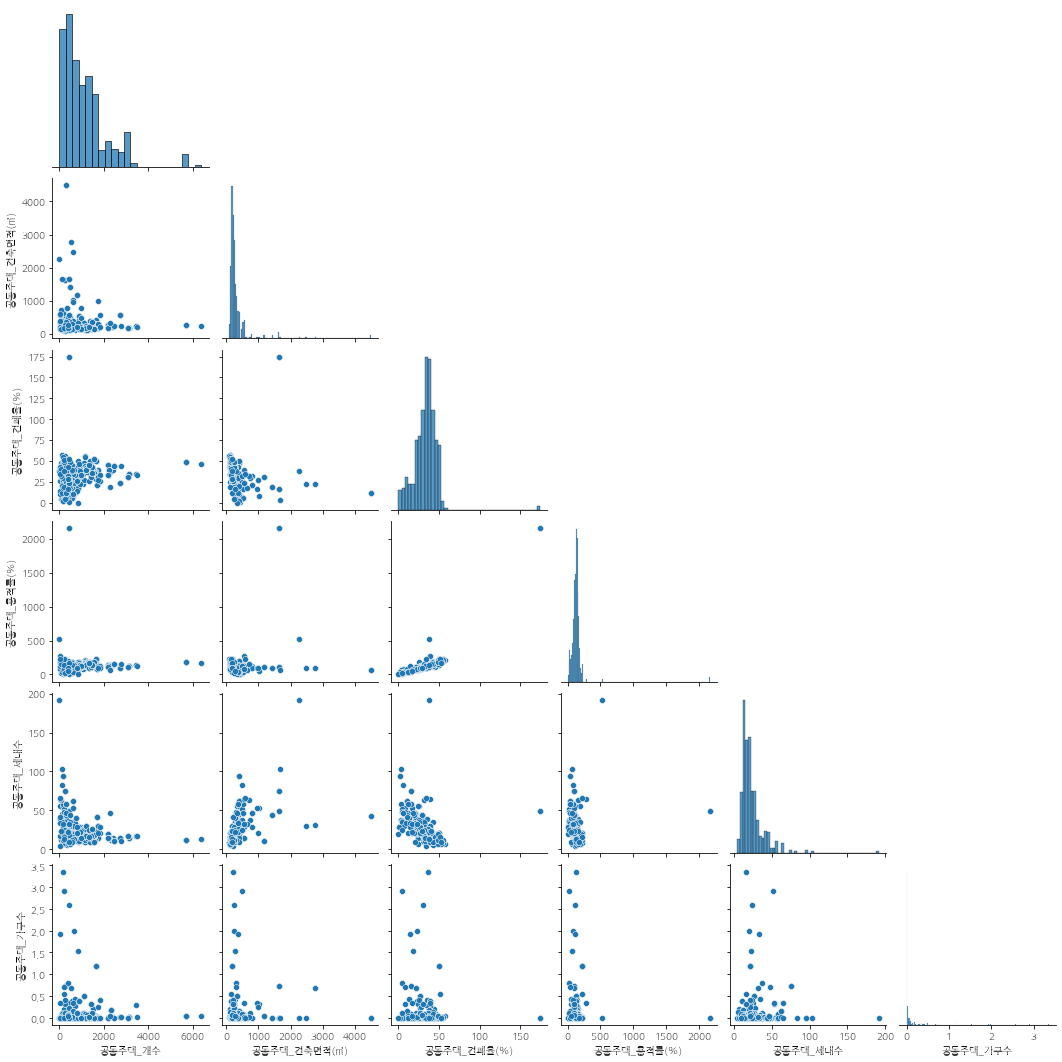

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df_common, corner=True)

In [ ]:
## 세로버전 코드
# (ggplot(df_common)
# + aes(x = '행정동명', y = '공동주택_개수', fill = '공동주택_개수')
# + geom_bar(stat = 'identity')+coord_flip() 
# + geom_point()
# + labs(x='행정동', y= '공동주택 개수', title = '행정동 별 공동주택 개수')
# + theme(text = element_text(family = "NanumBarunGothic"), figure_size = (10,70))       
# )

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


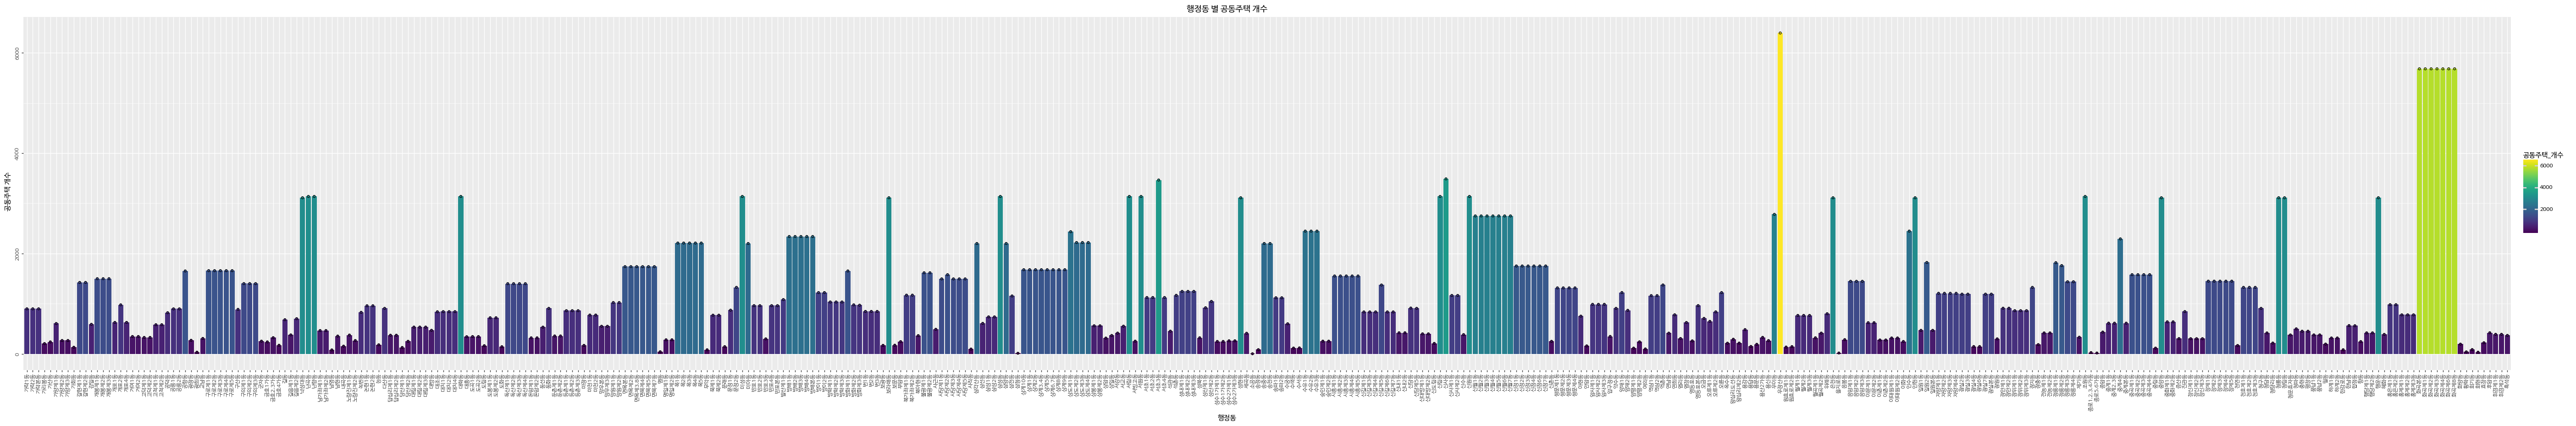

<ggplot: (8744502210038)>

In [ ]:
(ggplot(df_common)
+ aes(x = '행정동명', y = '공동주택_개수', fill = '공동주택_개수')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='행정동', y= '공동주택 개수', title = '행정동 별 공동주택 개수')
+ theme(text = element_text(family = "NanumBarunGothic"), axis_text = element_text(angle=90),figure_size = (70,10))       
)

In [422]:
df_code_hangjeong.columns

Index(['행정동코드', '시군구명', '읍면동명', 'geometry', '위도', '경도'], dtype='object')

In [428]:
# 공동주택_개수
center = (37.5642135, 127.0016985)
zoom = 13

m = folium.Map(location=center, zoom_start=11)
choropleth = folium.Choropleth(
    geo_data = df_code_hangjeong,
    data = df_common,
    columns = ('행정동명', '공동주택_개수'),
    key_on = 'feature.properties.읍면동명',
    fill_color = 'BuPu',
    legend_name = 'None',
).add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['읍면동명'])
)

m

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


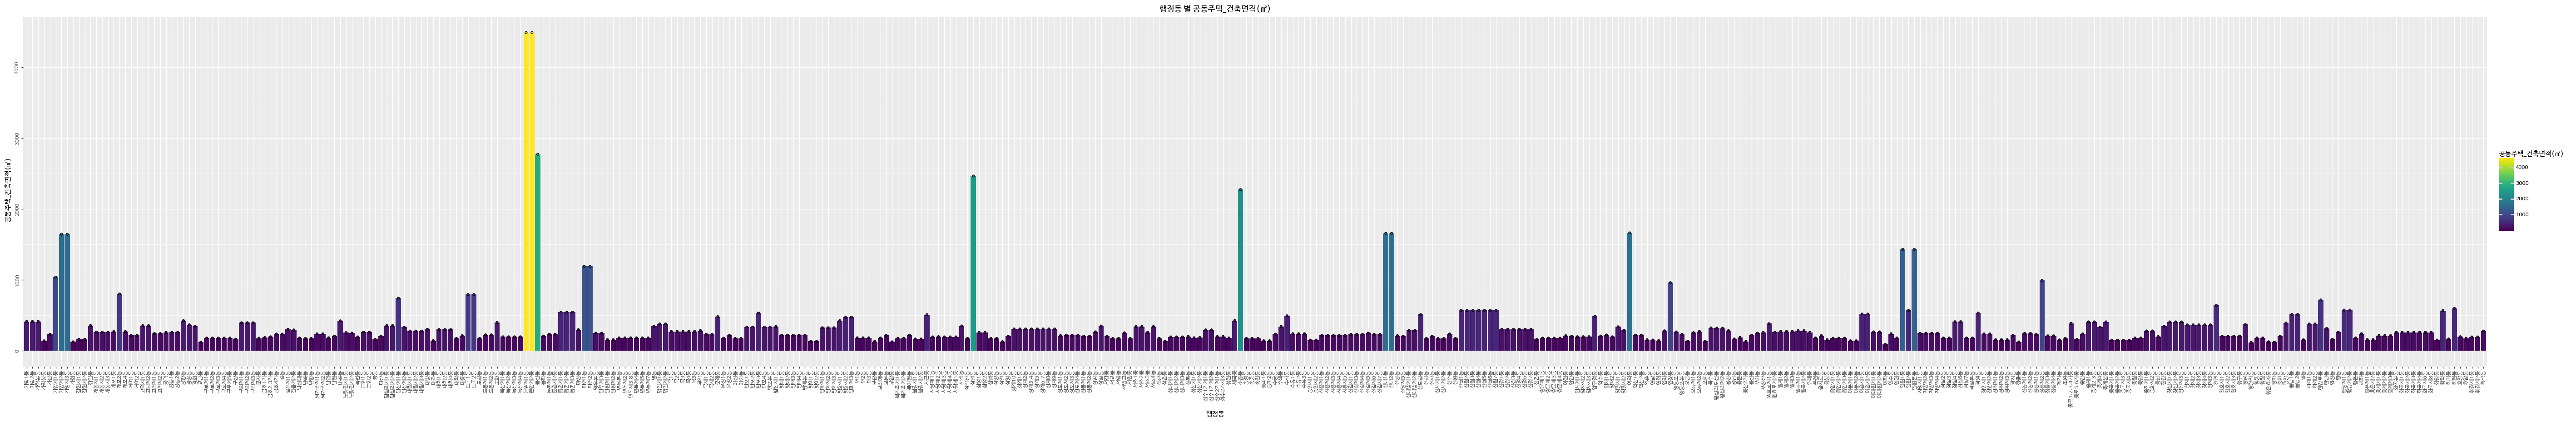

<ggplot: (-9223363292341555161)>

In [ ]:
(ggplot(df_common)
+ aes(x = '행정동명', y = '공동주택_건축면적(㎡)', fill = '공동주택_건축면적(㎡)')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='행정동', y= '공동주택_건축면적(㎡)', title = '행정동 별 공동주택_건축면적(㎡)')
+ theme(text = element_text(family = "NanumBarunGothic"), axis_text = element_text(angle=90),figure_size = (70,10))       
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


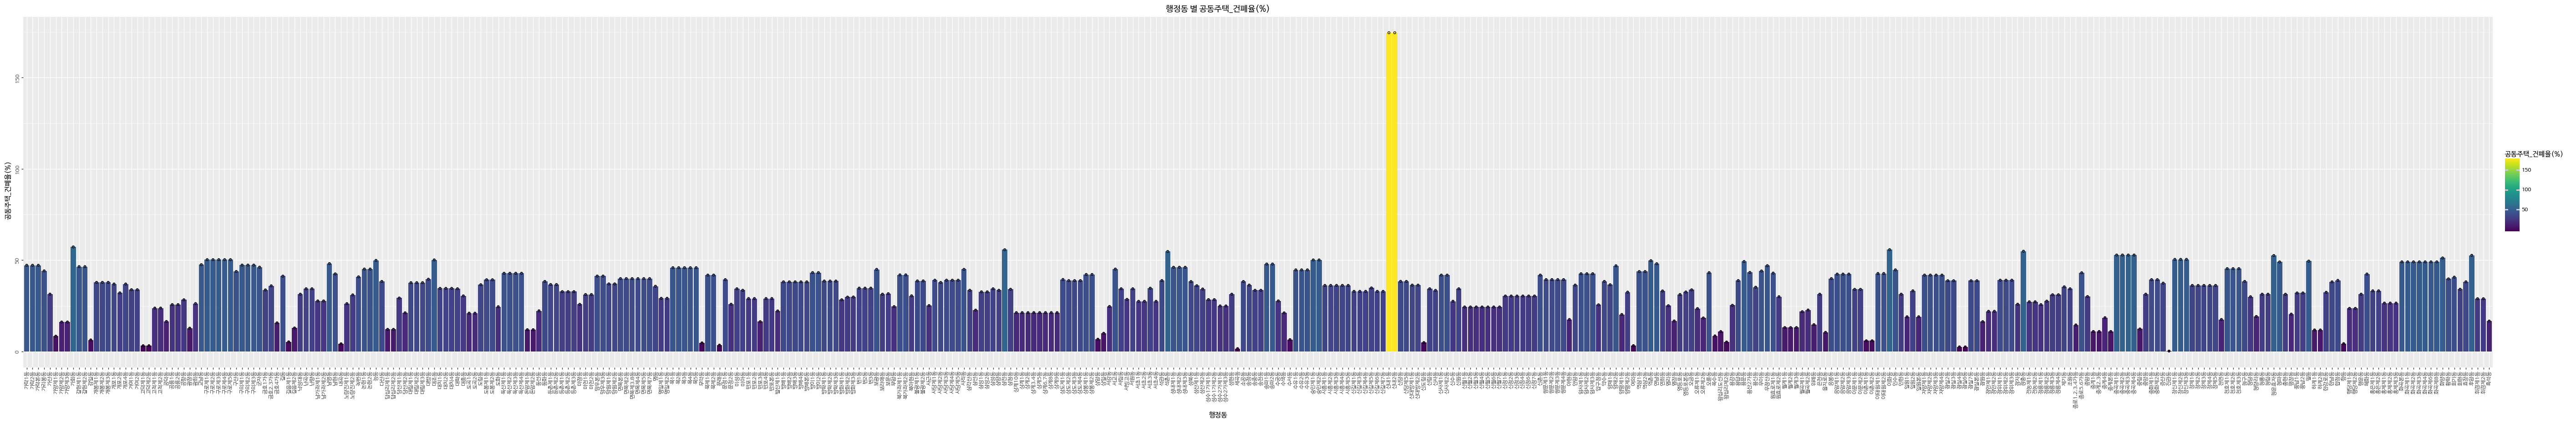

<ggplot: (-9223363292343417428)>

In [ ]:
(ggplot(df_common)
+ aes(x = '행정동명', y = '공동주택_건폐율(%)', fill = '공동주택_건폐율(%)')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='행정동', y= '공동주택_건폐율(%)', title = '행정동 별 공동주택_건폐율(%)')
+ theme(text = element_text(family = "NanumBarunGothic"), axis_text = element_text(angle=90),figure_size = (70,10))       
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


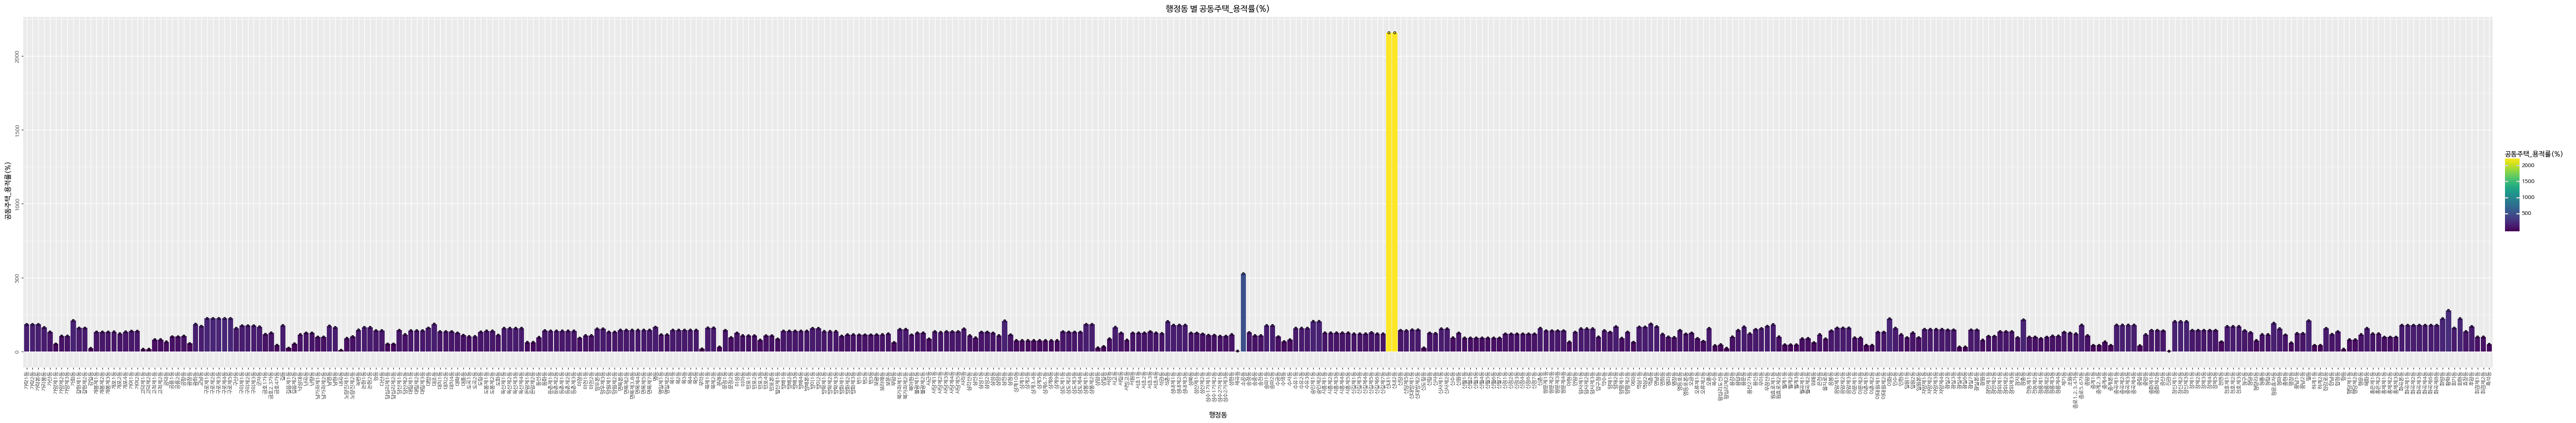

<ggplot: (8744500097095)>

In [ ]:
(ggplot(df_common)
+ aes(x = '행정동명', y = '공동주택_용적률(%)', fill = '공동주택_용적률(%)')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='행정동', y= '공동주택_용적률(%)', title = '행정동 별 공동주택_용적률(%)')
+ theme(text = element_text(family = "NanumBarunGothic"), axis_text = element_text(angle=90),figure_size = (70,10))       
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


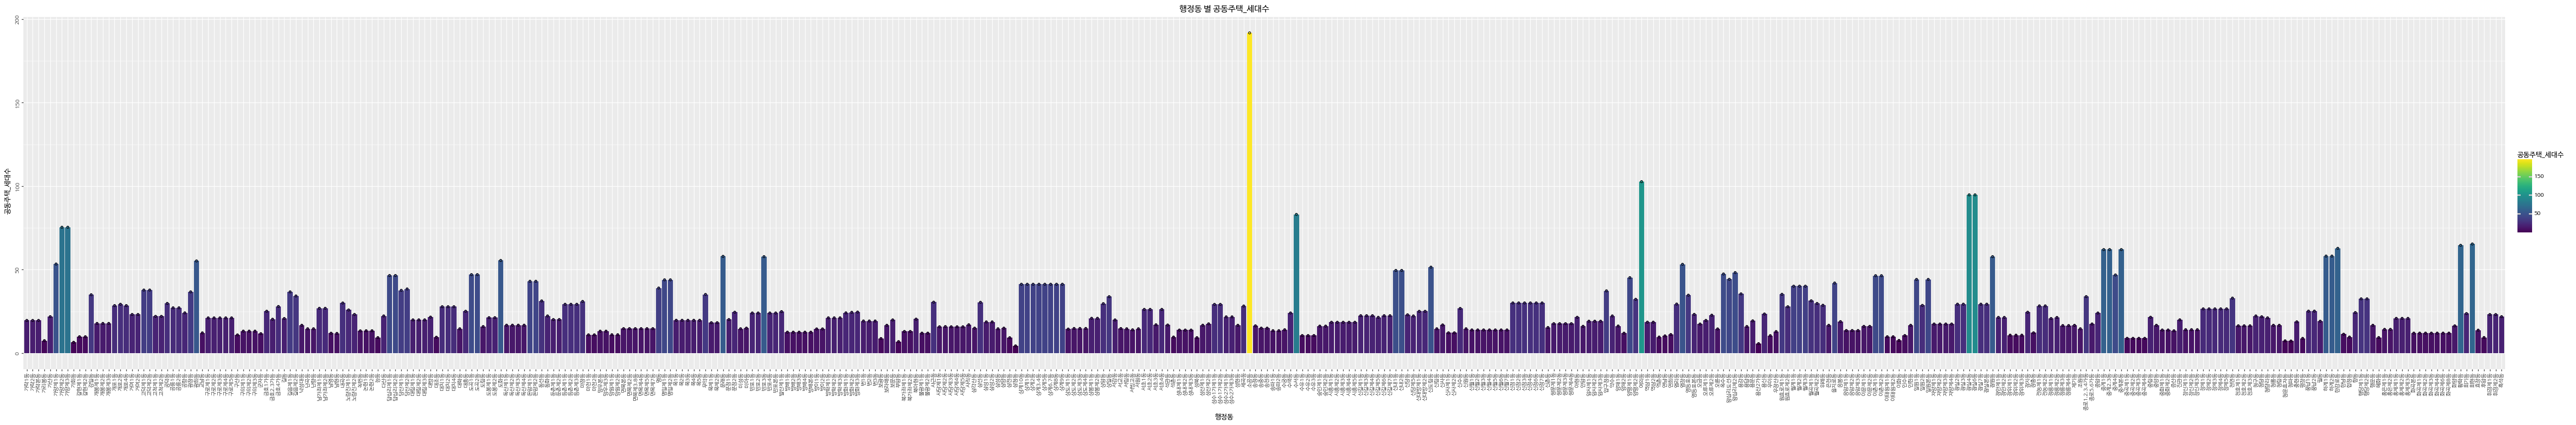

<ggplot: (-9223363292355833635)>

In [ ]:
(ggplot(df_common)
+ aes(x = '행정동명', y = '공동주택_세대수', fill = '공동주택_세대수')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='행정동', y= '공동주택_세대수', title = '행정동 별 공동주택_세대수')
+ theme(text = element_text(family = "NanumBarunGothic"), axis_text = element_text(angle=90),figure_size = (70,10))       
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


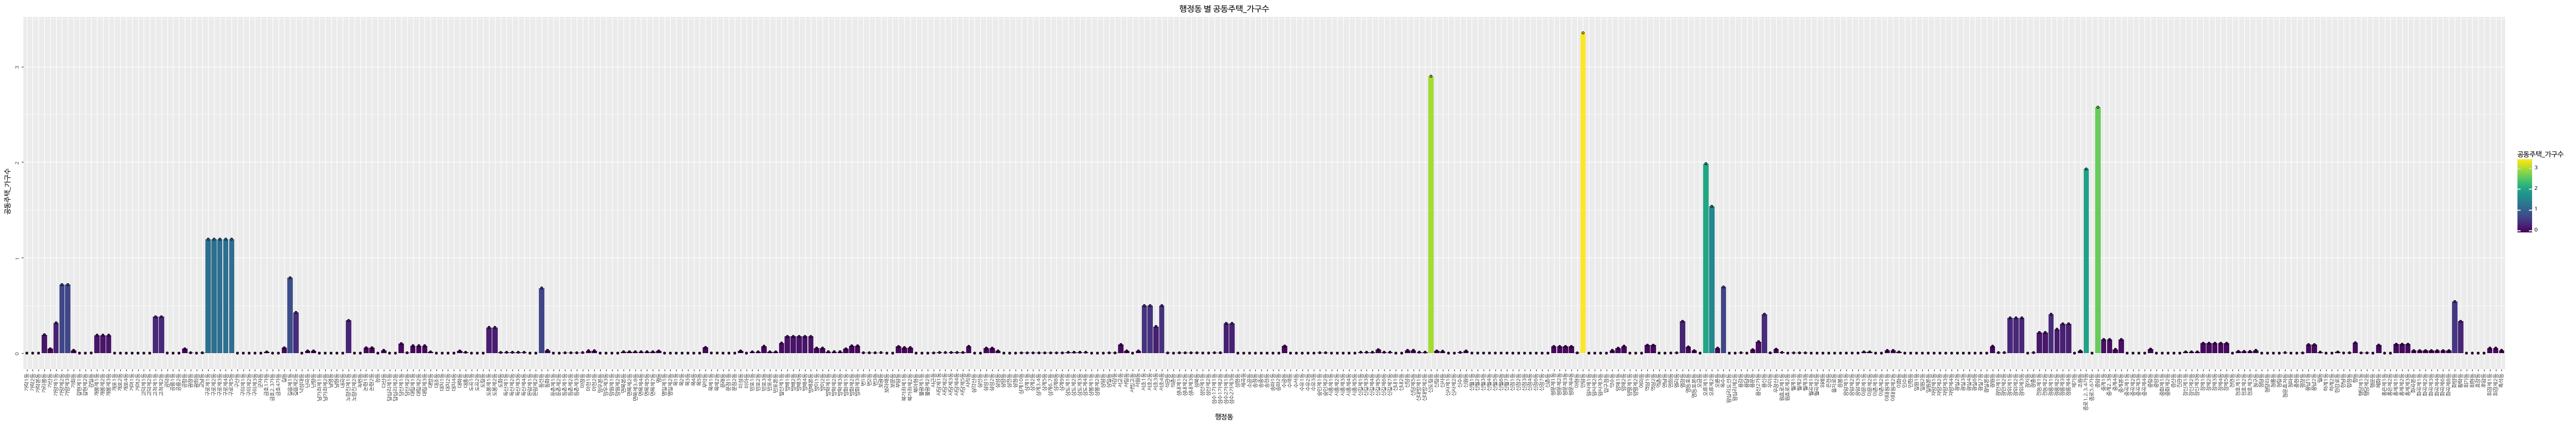

<ggplot: (8744498189860)>

In [ ]:
(ggplot(df_common)
+ aes(x = '행정동명', y = '공동주택_가구수', fill = '공동주택_가구수')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='행정동', y= '공동주택_가구수', title = '행정동 별 공동주택_가구수')
+ theme(text = element_text(family = "NanumBarunGothic"), axis_text = element_text(angle=90),figure_size = (70,10))       
)

- 가구수와 세대수의 차이  (통계청 답변)   

인구주택총조사에서 ‘가구’는 1인 또는 2인 이상이 모여서 취사, 취침 등 생계를 같이하는 생활단위로 정의하고 있으며, 주민등록의 ‘세대’는 법률로 정의되어 있지는 않지만, 주민등록사무편람을 보면 주거 및 생계를 같이 하는 집단으로 정의하고 있습니다.

질의하신 바와 같이 ‘가구’와 ‘세대’의 개념 차이는 없습니다.

그럼에도 불구하고 가구수와 세대수가 차이가 나는 이유는 주민등록세대의 경우 실제 한 가구임에도 불구하고 개인의 특별한 목적으로 세대를 분리, 통합하여 등록하기 때문에 차이가 발생한다고 할 수 있습니다. 즉, 통계를 위한 조사 자료와 행정을 위한 등록 자료의 차이로 볼 수 있습니다.

인구주택총조사에서는 가구를 직접 방문하여 기준에 맞게 조사를 하여 집계되는 것인데 반해 주민등록의 세대는 국민의 등록에 의해 생성된 자료로 집계되는 것입니다. 일반적으로 세대수가 가구수에 비해 약 10%가 더 많은 것으로 파악됩니다.

참고적으로 2005년 기준의 가구수와 세대수는 아래와 같습니다.
 ○ 인구주택총조사 가구수 : 15,988,274가구
 ○ 주민등록 세대수 : 17,857,511가구

## 구별로 요약 보기

In [ ]:
df_merged

,시군구명,읍면동명,행정동코드,법정동코드_y,대지위치,도로명대지위치,대지면적(㎡),건축면적(㎡),건폐율(%),용적률(%),연면적(㎡),주용도코드,주용도코드명,세대수(세대),가구수(가구)
0,강남구,역삼1동,1168064000,1168010100,서울특별시 강남구 역삼동 601-21번지,서울특별시 강남구 봉은사로4길 7,301.2,180.42,59.90,196.75,592.61,02000,공동주택,12,0
1,강남구,역삼2동,1168065000,1168010100,서울특별시 강남구 역삼동 601-21번지,서울특별시 강남구 봉은사로4길 7,301.2,180.42,59.90,196.75,592.61,02000,공동주택,12,0
2,강남구,역삼1동,1168064000,1168010100,서울특별시 강남구 역삼동 601-23번지,서울특별시 강남구 봉은사로4길 9,302.7,164.90,54.48,214.75,650.05,02000,공동주택,15,0
3,강남구,역삼2동,1168065000,1168010100,서울특별시 강남구 역삼동 601-23번지,서울특별시 강남구 봉은사로4길 9,302.7,164.90,54.48,214.75,650.05,02000,공동주택,15,0
4,강남구,역삼1동,1168064000,1168010100,서울특별시 강남구 역삼동 601-25번지,서울특별시 강남구 강남대로110길 19-4,0.0,109.80,0.00,0.00,326.76,02000,공동주택,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473142,중랑구,신내2동,1126069000,1126010600,서울특별시 중랑구 신내동 831번지,서울특별시 중랑구 신내역로 160,0.0,20.85,0.00,0.00,20.85,02000,공동주택,0,0
473143,중랑구,신내1동,1126068000,1126010600,서울특별시 중랑구 신내동 831번지,서울특별시 중랑구 신내역로 160,0.0,0.00,0.00,0.00,45.93,02000,공동주택,0,0
473144,중랑구,신내2동,1126069000,1126010600,서울특별시 중랑구 신내동 831번지,서울특별시 중랑구 신내역로 160,0.0,0.00,0.00,0.00,45.93,02000,공동주택,0,0
473145,중랑구,신내1동,1126068000,1126010600,서울특별시 중랑구 신내동 831번지,서울특별시 중랑구 신내역로 160,0.0,0.00,0.00,0.00,7.26,02000,공동주택,0,0


In [ ]:
df_common_gu= df_merged.groupby('시군구명', as_index =False)['행정동코드'].agg(['count'])
df_common_gu[['건축면적(㎡)', '건폐율(%)','용적률(%)', '세대수(세대)','가구수(가구)']] = df_merged.groupby('시군구명', as_index = False)[['건축면적(㎡)', '건폐율(%)','용적률(%)', '세대수(세대)','가구수(가구)']].agg(['mean'])

In [ ]:
df_common_gu

,count,건축면적(㎡),건폐율(%),용적률(%),세대수(세대),가구수(가구)
시군구명,,,,,,
강남구,15608,443.687319,33.793384,131.152925,26.587391,0.024346
강동구,14276,225.945324,39.245412,148.816480,19.991804,0.008686
강북구,26122,206.321401,38.963985,132.287158,13.262155,0.000651
강서구,56858,319.091148,44.630169,164.280077,15.777094,0.044303
관악구,62883,175.744661,33.088280,121.045508,15.533133,0.012595
광진구,16270,244.811119,47.318507,167.274526,13.155378,0.006577
구로구,16722,219.606985,40.313998,165.163382,20.328430,0.867540
금천구,13615,206.691969,38.848879,139.384388,17.841351,0.004333
노원구,22307,311.511693,19.388203,69.217531,42.774734,0.017663


In [ ]:
df_common_gu.reset_index(level =['시군구명'], inplace = True)
df_common_gu.columns = ['시군구명', '공동주택_개수', '공동주택_건축면적(㎡)', '공동주택_건폐율(%)', '공동주택_용적률(%)', '공동주택_세대수', '공동주택_가구수']
df_common_gu 

,시군구명,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_용적률(%),공동주택_세대수,공동주택_가구수
0,강남구,15608,443.687319,33.793384,131.152925,26.587391,0.024346
1,강동구,14276,225.945324,39.245412,148.816480,19.991804,0.008686
2,강북구,26122,206.321401,38.963985,132.287158,13.262155,0.000651
3,강서구,56858,319.091148,44.630169,164.280077,15.777094,0.044303
4,관악구,62883,175.744661,33.088280,121.045508,15.533133,0.012595
5,광진구,16270,244.811119,47.318507,167.274526,13.155378,0.006577
6,구로구,16722,219.606985,40.313998,165.163382,20.328430,0.867540
7,금천구,13615,206.691969,38.848879,139.384388,17.841351,0.004333
8,노원구,22307,311.511693,19.388203,69.217531,42.774734,0.017663
9,도봉구,17075,286.928517,37.872254,140.976555,22.372650,0.091420


/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


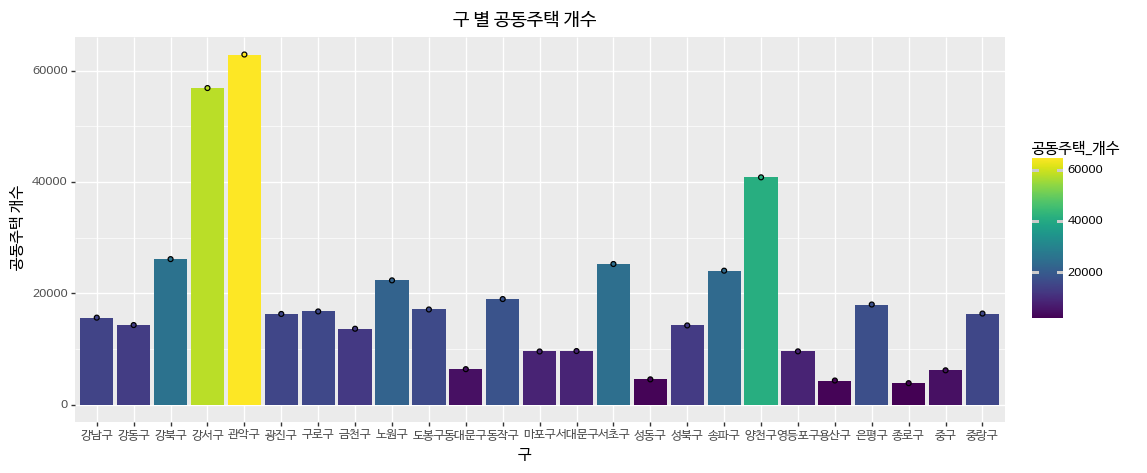

<ggplot: (8744514437398)>

In [ ]:
(ggplot(df_common_gu)
+ aes(x = '시군구명', y = '공동주택_개수', fill = '공동주택_개수')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='구', y= '공동주택 개수', title = '구 별 공동주택 개수')
+ theme(text = element_text(family = "NanumBarunGothic"),figure_size = (12,5))       
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


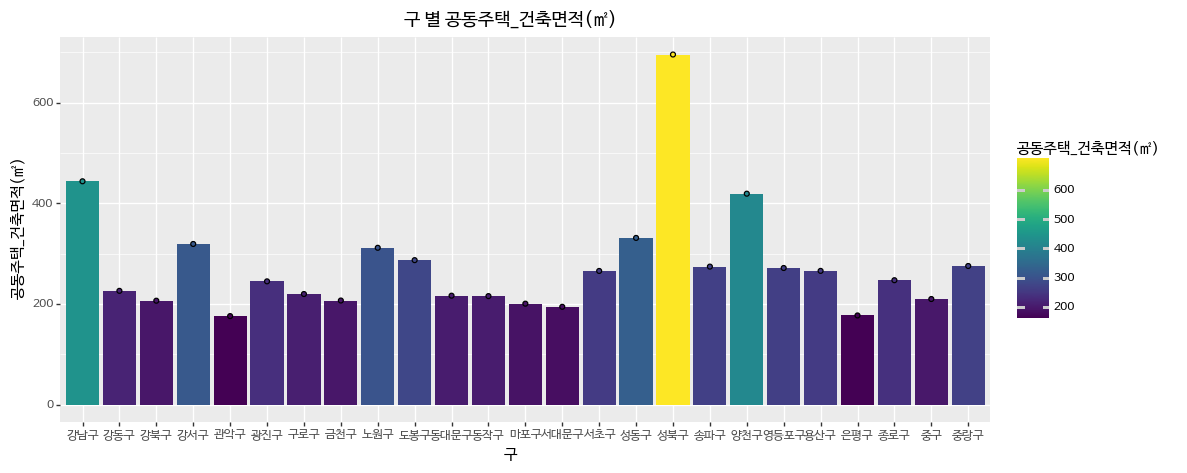

<ggplot: (-9223363292363020814)>

In [ ]:
(ggplot(df_common_gu)
+ aes(x = '시군구명', y = '공동주택_건축면적(㎡)', fill = '공동주택_건축면적(㎡)')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='구', y= '공동주택_건축면적(㎡)', title = '구 별 공동주택_건축면적(㎡)')
+ theme(text = element_text(family = "NanumBarunGothic"),figure_size = (12,5))       
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


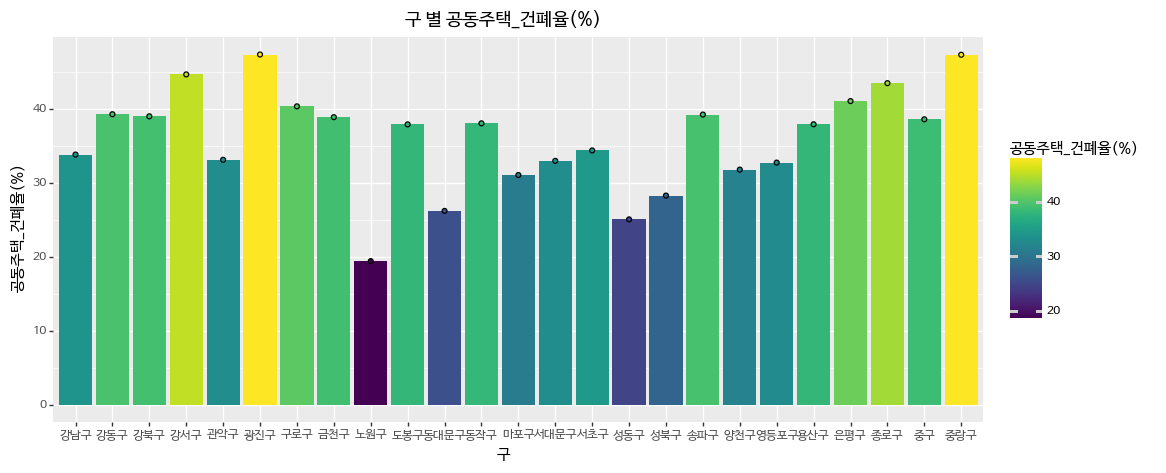

<ggplot: (8744491754886)>

In [ ]:
(ggplot(df_common_gu)
+ aes(x = '시군구명', y = '공동주택_건폐율(%)', fill = '공동주택_건폐율(%)')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='구', y= '공동주택_건폐율(%)', title = '구 별 공동주택_건폐율(%)')
+ theme(text = element_text(family = "NanumBarunGothic"),figure_size = (12,5))       
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


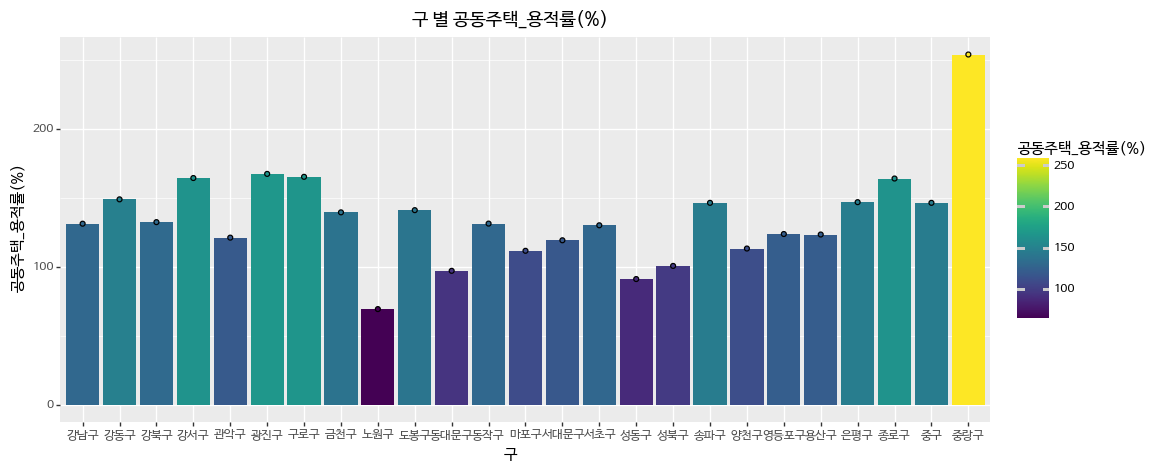

<ggplot: (-9223363292339862163)>

In [ ]:
(ggplot(df_common_gu)
+ aes(x = '시군구명', y = '공동주택_용적률(%)', fill = '공동주택_용적률(%)')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='구', y= '공동주택_용적률(%)', title = '구 별 공동주택_용적률(%)')
+ theme(text = element_text(family = "NanumBarunGothic"),figure_size = (12,5))       
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


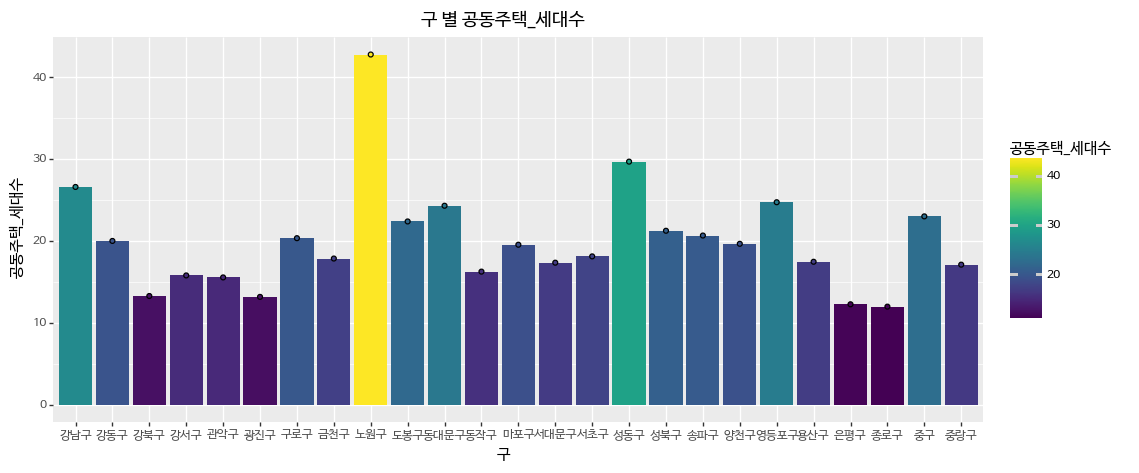

<ggplot: (-9223363292362543728)>

In [ ]:
(ggplot(df_common_gu)
+ aes(x = '시군구명', y = '공동주택_세대수', fill = '공동주택_세대수')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='구', y= '공동주택_세대수', title = '구 별 공동주택_세대수')
+ theme(text = element_text(family = "NanumBarunGothic"),figure_size = (12,5))       
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


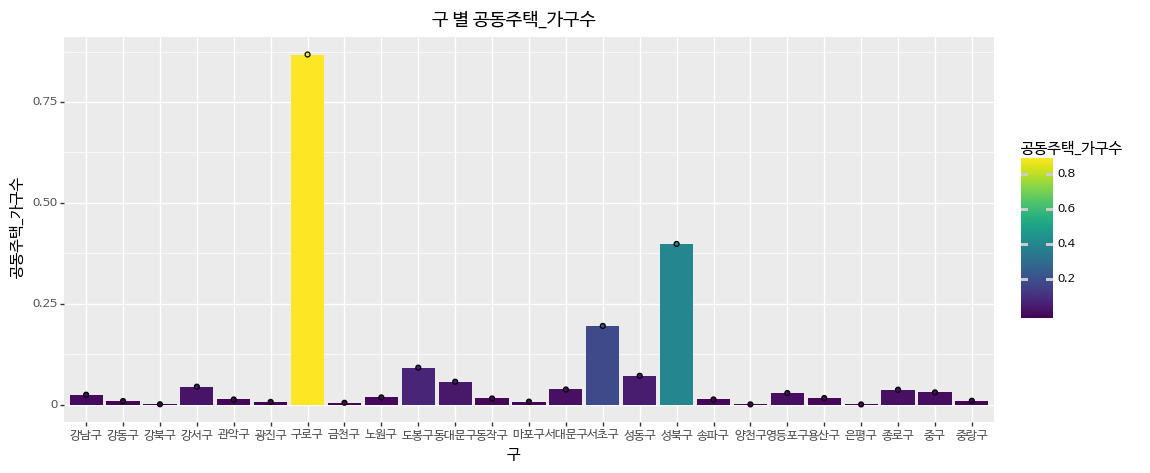

<ggplot: (8744491624340)>

In [ ]:
(ggplot(df_common_gu)
+ aes(x = '시군구명', y = '공동주택_가구수', fill = '공동주택_가구수')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='구', y= '공동주택_가구수', title = '구 별 공동주택_가구수')
+ theme(text = element_text(family = "NanumBarunGothic"),figure_size = (12,5))       
)